### transformers

Large Language Models (LLMs) for vision, often referred to as Vision Transformers (ViTs) or multimodal models, combine the capabilities of LLMs with computer vision tasks. One prominent example is **CLIP (Contrastive Language–Image Pretraining)** by OpenAI, which can understand images and text together.

Another example is **OCR models based on Vision Transformers**, such as **TrOCR (Transformer-based OCR)** by Microsoft. These models leverage the transformer architecture for end-to-end text recognition from images.
These models are state-of-the-art and provide high accuracy for OCR tasks. They leverage the power of transformers to understand and process images and text together, making them a powerful alternative to traditional OCR methods.

* https://huggingface.co/microsoft/trocr-base-handwritten

In [4]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from PIL import Image
import requests

# Load the processor and model
processor = TrOCRProcessor.from_pretrained('microsoft/trocr-base-handwritten')
model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-base-handwritten')


Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "qkv_bias": false,
  "transformers_version": "4.47.1"
}

Config of the decoder: <class 'transformers.models.trocr.modeling_trocr.TrOCRForCausalLM'> is overwritten by shared decoder config: TrOCRConfig {
  "activation_dropout": 0.0,
  "activation_function": "gelu",
  "add_cross_attention": true,
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "classifier_dropout": 0.0,
  "cross_attention_hidden_size": 768,
  "d_model": 1024,
  "decoder_attention_heads": 16,
  "decoder_ffn_dim": 4096,
  "decoder

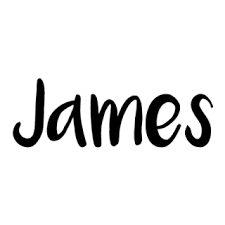

In [68]:

# Load an image
image_path =  "../handwriting.png"
image = Image.open(image_path).convert("RGB")  # Ensure the image is in RGB format
image

In [69]:
image.size

(225, 225)

In [71]:

# Establecer el nuevo tamaño (ancho, alto)
new_size = (384, 384)  # ejemplo: 800x600 pixels

# Redimensionar la imagen
image = image.resize(new_size)

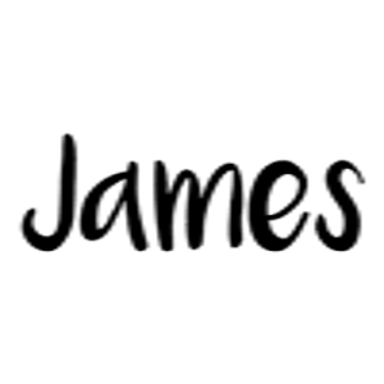

In [72]:
image

In [73]:
# Preprocess the image
pixel_values = processor(images=image, return_tensors="pt").pixel_values



In [74]:

# Generate text
generated_ids = model.generate(pixel_values)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

print(f"Detected text: {generated_text}")


Detected text: james .
